We'll look at  bank stocks and see how they changed throughout the financial crisis all the way to early 2016.We will look at he following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

### Downloading libraries and the data

In [12]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
%matplotlib inline

In [16]:
import plotly
import cufflinks as cf
cf.go_offline()

In [17]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

In [10]:
# Bank of America
BAC = data.DataReader("BAC", 'yahoo', start, end)
# CitiGroup
C = data.DataReader("C", 'yahoo', start, end)
# Goldman Sachs
GS = data.DataReader("GS", 'yahoo', start, end)
# JPMorgan Chase
JPM = data.DataReader("JPM", 'yahoo', start, end)
# Morgan Stanley
MS = data.DataReader("MS", 'yahoo', start, end)
# Wells Fargo
WFC = data.DataReader("WFC", 'yahoo', start, end)

In [11]:
name_list = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [13]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=name_list)

In [15]:
bank_stocks

BAC                                                          \
                 High        Low       Open      Close      Volume  Adj Close   
Date                                                                            
2006-01-03  47.180000  46.150002  46.919998  47.080002  16296700.0  33.777500   
2006-01-04  47.240002  46.450001  47.000000  46.580002  17757900.0  33.418785   
2006-01-05  46.830002  46.320000  46.580002  46.639999  14970700.0  33.461834   
2006-01-06  46.910000  46.349998  46.799999  46.570000  12599800.0  33.411602   
2006-01-09  46.970001  46.360001  46.720001  46.599998  15619400.0  33.433121   
...               ...        ...        ...        ...         ...        ...   
2015-12-24  17.379999  17.219999  17.320000  17.270000  29369400.0  15.281426   
2015-12-28  17.230000  16.980000  17.219999  17.129999  41777500.0  15.157549   
2015-12-29  17.350000  17.160000  17.250000  17.280001  45670400.0  15.290281   
2015-12-30  17.240000  17.040001  17.200001  17.049999  35066400.0  15.086761   
2015-12-31  17.070000  16.830000  17.010000  16.830000  47153000.0  14.892092   

                     C                                      ...         MS  \
                  High         Low        Open       Close  ...       Open   
Date                                                        ...              
2006-01-03  493.799988  481.100006  490.000000  492.899994  ...  57.169998   
2006-01-04  491.000000  483.500000  488.600006  483.799988  ...  58.700001   
2006-01-05  487.799988  484.000000  484.399994  486.200012  ...  58.549999   
2006-01-06  489.000000  482.000000  488.799988  486.200012  ...  58.770000   
2006-01-09  487.399994  483.000000  486.000000  483.899994  ...  58.630001   
...                ...         ...         ...         ...  ...        ...   
2015-12-24   52.970001   52.450001   52.480000   52.709999  ...  32.570000   
2015-12-28   52.570000   51.959999   52.570000   52.380001  ...  32.360001   
2015-12-29   53.220001   52.740002   52.759998   52.980000  ...  32.439999   
2015-12-30   52.939999   52.250000   52.840000   52.299999  ...  32.500000   
2015-12-31   52.389999   51.750000   52.070000   51.750000  ...  31.910000   

                                                   WFC                        \
                Close     Volume  Adj Close       High        Low       Open   
Date                                                                           
2006-01-03  58.310001  5377000.0  35.558949  31.975000  31.195000  31.600000   
2006-01-04  58.349998  7977800.0  35.583359  31.820000  31.365000  31.799999   
2006-01-05  58.509998  5778000.0  35.680923  31.555000  31.309999  31.500000   
2006-01-06  58.570000  6889800.0  35.717514  31.775000  31.385000  31.580000   
2006-01-09  59.189999  4144500.0  36.095604  31.825001  31.555000  31.674999   
...               ...        ...        ...        ...        ...        ...   
2015-12-24  32.480000  2798200.0  27.602325  55.090000  54.709999  54.970001   
2015-12-28  32.169998  5420300.0  27.338877  54.779999  54.169998  54.549999   
2015-12-29  32.549999  6388200.0  27.661812  55.349998  54.990002  55.110001   
2015-12-30  32.230000  5057200.0  27.389870  55.310001  54.790001  55.270000   
2015-12-31  31.809999  8154300.0  27.032942  54.950001  54.220001  54.509998   

                                              
                Close      Volume  Adj Close  
Date                                          
2006-01-03  31.900000  11016400.0  20.242815  
2006-01-04  31.530001  10870000.0  20.008028  
2006-01-05  31.495001  10158000.0  19.985819  
2006-01-06  31.680000   8403800.0  20.103216  
2006-01-09  31.674999   5619600.0  20.100048  
...               ...         ...        ...  
2015-12-24  54.820000   4999400.0  45.304943  
2015-12-28  54.680000   8288800.0  45.189251  
2015-12-29  55.290001   7894900.0  45.693367  
2015-12-30  54.889999   8016900.0  45.362793  
2015-12-31  54.360001  10929800.0  44.924789  

[2517 rows

In [18]:
sns.set_style('whitegrid')

In [37]:
bank_close=pd.DataFrame()
for name in name_list:
    bank_close=pd.concat([bank_close,bank_stocks[name]['Close']],axis=1)
bank_close.columns=name_list

In [40]:
bank_close.iplot()

We see a crush in citybank stocks in 2009. Although it was the highest values stock, decrease in vaşue has started in late 2007 and during the 2009 crises,it crashed.All of the banks lost value during 2009;however, get back to normal in late 2009.Morgan Stanley could not get back to it's previous value.I will plot again without citybank to see other banks in more detail.

In [43]:
bank_close[['BAC','GS', 'JPM', 'MS', 'WFC']].iplot()

Now i will examine returns on stocks

In [45]:
returns=pd.DataFrame()
returns = bank_close.pct_change()
returns.head()

BAC         C        GS       JPM        MS  \
2006-01-03 00:00:00       NaN       NaN       NaN       NaN       NaN   
2006-01-04 00:00:00 -0.010620 -0.018462 -0.013812 -0.014183  0.000686   
2006-01-05 00:00:00  0.001288  0.004961 -0.000393  0.003029  0.002742   
2006-01-06 00:00:00 -0.001501  0.000000  0.014169  0.007046  0.001025   
2006-01-09 00:00:00  0.000644 -0.004731  0.012030  0.016242  0.010586   

                          WFC  
2006-01-03 00:00:00       NaN  
2006-01-04 00:00:00 -0.011599  
2006-01-05 00:00:00 -0.001110  
2006-01-06 00:00:00  0.005874  
2006-01-09 00:00:00 -0.000158

In [47]:
returns.iplot()

Most devaiton accured during 2009 and last quarter of 2012.

In [53]:
returns.std().sort_values(ascending=False)

C      0.038672
MS     0.037819
BAC    0.036647
WFC    0.030238
JPM    0.027667
GS     0.025390
dtype: float64

Citybank has the highest risk 

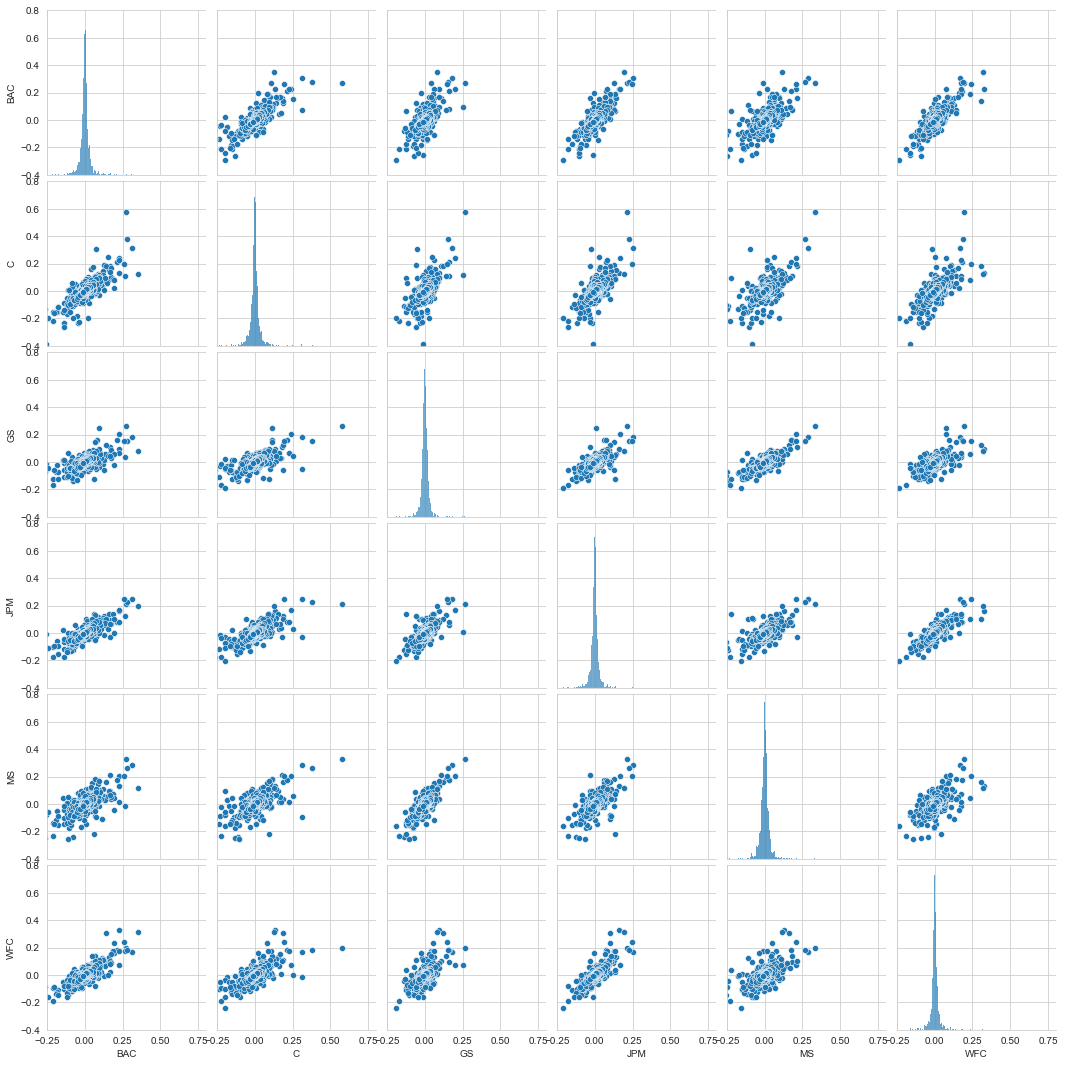

In [59]:
p=sns.pairplot(returns[1:])
p.set(xlim=(-0.25,0.8), ylim = (-0.4,0.8))

Because all of this firms work in the same industry, it is expected them to have correlation. Golden Sacks and JPMorgan Chase shows smaller change while CityBanks show higher change with changes in the industry.This is in line with standard deviation values we found previously.

<AxesSubplot:>

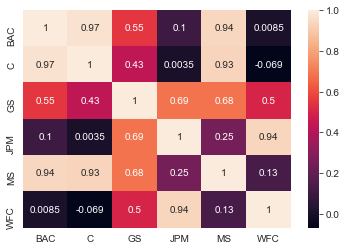

In [70]:
sns.heatmap(bank_close.corr(),annot=True)

In [66]:
returns.idxmax()

BAC   2009-04-09
C     2008-11-24
GS    2008-11-24
JPM   2009-01-21
MS    2008-10-13
WFC   2008-07-16
dtype: datetime64[ns]

In [67]:
returns.idxmin()

BAC   2009-01-20
C     2009-02-27
GS    2009-01-20
JPM   2009-01-20
MS    2008-10-09
WFC   2009-01-20
dtype: datetime64[ns]

JPM and MS had their highest and lowest returns in same months respectively.All of the higest and lowest returns are in end og 2008 and begining of 2009.

In [80]:
BAC[['Open', 'High', 'Low', 'Close']].iplot(kind='candle')